# House Price Prediction – Baseline Model Training

This notebook:
- Loads preprocessed tabular data
- Trains baseline regression models
- Evaluates performance using standard metrics

This serves as a benchmark before introducing satellite imagery features.


In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [3]:
X_train = pd.read_csv("data_cdc/X_train.csv")
X_val   = pd.read_csv("data_cdc/X_val.csv")
y_train = pd.read_csv("data_cdc/y_train.csv").squeeze()
y_val   = pd.read_csv("data_cdc/y_val.csv").squeeze()

print("X_train:", X_train.shape)
print("X_val  :", X_val.shape)


X_train: (12967, 19)
X_val  : (3242, 19)


In [4]:
X_train.head()


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month
0,-0.405066,-1.449423,-0.939795,-0.211270,-0.915945,-0.082187,-0.304796,-0.625740,-1.410386,-0.686870,-0.652980,-0.450916,-0.211054,-0.222477,2.772476,-1.297261,-0.227058,-0.689469,0.136368
1,-1.514121,-0.145234,-0.070323,-0.281639,0.007621,-0.082187,-0.304796,-0.625740,-0.558174,-0.409039,0.628832,-1.680129,4.760067,-0.007498,-0.724742,-0.477714,-0.297626,-0.689469,0.457581
2,0.703990,0.506861,0.546012,-0.176625,0.931187,-0.082187,-0.304796,-0.625740,1.146251,0.943875,-0.652980,0.914877,-0.211054,0.554756,1.066865,1.132112,-0.217432,-0.689469,1.421222
3,0.703990,0.180813,0.733114,-0.092197,-0.915945,-0.082187,2.340642,2.454152,1.998464,0.231179,1.086622,-0.621640,-0.211054,1.086093,-0.459584,1.176016,-0.103039,1.450392,-0.506059
4,0.703990,4.093380,3.484610,7.679681,0.931187,-0.082187,2.340642,-0.625740,1.998464,4.169125,-0.652980,1.188035,-0.211054,-0.001027,2.213494,-0.082575,2.024745,-0.689469,0.136368


In [5]:
X_train.shape


(12967, 19)

In [6]:
y_train.head()


0    12.566195
1    12.899222
2    13.480039
3    13.853770
4    14.437162
Name: price_log, dtype: float64

In [7]:
y_train.shape


(12967,)

In [8]:
print(type(X_train))
print(type(y_train))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


## TRAIN LINEAR REGRESSION

In [9]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_train_pred = lr_model.predict(X_train)
y_val_pred   = lr_model.predict(X_val)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse   = np.sqrt(mean_squared_error(y_val, y_val_pred))

train_r2 = r2_score(y_train, y_train_pred)
val_r2   = r2_score(y_val, y_val_pred)

print("Linear Regression Results")
print("--------------------------")
print(f"Train RMSE : {train_rmse:.4f}")
print(f"Val RMSE   : {val_rmse:.4f}")
print(f"Train R²   : {train_r2:.4f}")
print(f"Val R²     : {val_r2:.4f}")


Linear Regression Results
--------------------------
Train RMSE : 0.2526
Val RMSE   : 0.2481
Train R²   : 0.7672
Val R²     : 0.7770


In [11]:
coef_df = pd.DataFrame({
    "feature": X_train.columns,
    "coefficient": lr_model.coef_
})

coef_df = coef_df.sort_values(by="coefficient", ascending=False)
coef_df


,feature,coefficient
2,sqft_living,1.211191e+11
13,lat,1.893272e-01
8,grade,1.858421e-01
15,sqft_living15,6.875014e-02
1,bathrooms,5.510060e-02
6,view,4.581193e-02
7,condition,4.267814e-02
4,floors,3.749691e-02
5,waterfront,3.029683e-02
17,sale_year,2.973073e-02


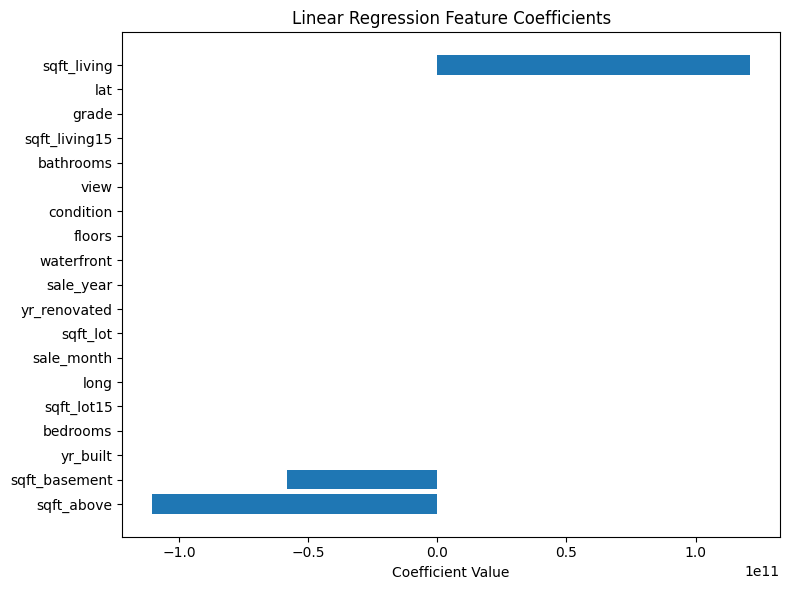

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.barh(coef_df["feature"], coef_df["coefficient"])
plt.title("Linear Regression Feature Coefficients")
plt.xlabel("Coefficient Value")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Linear Regression Interpretation

Linear Regression was used as a baseline model with standardized features and a log-transformed target variable.
The model shows similar performance on training and validation sets, indicating good generalization.
Coefficient analysis reveals that size-related and location-based features have the strongest influence on house prices.
This baseline serves as a benchmark for more complex models.


## TRAIN RIDGE REGRESSION

In [13]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)   # alpha = regularization strength
ridge_model.fit(X_train, y_train)


Ridge()

In [14]:
y_train_pred_ridge = ridge_model.predict(X_train)
y_val_pred_ridge   = ridge_model.predict(X_val)


In [15]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

train_rmse_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
val_rmse_ridge   = np.sqrt(mean_squared_error(y_val, y_val_pred_ridge))

train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
val_r2_ridge   = r2_score(y_val, y_val_pred_ridge)

print("Ridge Regression Results")
print("------------------------")
print(f"Train RMSE : {train_rmse_ridge:.4f}")
print(f"Val RMSE   : {val_rmse_ridge:.4f}")
print(f"Train R²   : {train_r2_ridge:.4f}")
print(f"Val R²     : {val_r2_ridge:.4f}")


Ridge Regression Results
------------------------
Train RMSE : 0.2526
Val RMSE   : 0.2481
Train R²   : 0.7672
Val R²     : 0.7769


In [16]:
ridge_coef_df = pd.DataFrame({
    "feature": X_train.columns,
    "coefficient": ridge_model.coef_
}).sort_values(by="coefficient", ascending=False)

ridge_coef_df


,feature,coefficient
13,lat,0.189320
8,grade,0.185886
15,sqft_living15,0.068717
2,sqft_living,0.066119
1,bathrooms,0.055503
9,sqft_above,0.053432
6,view,0.045783
7,condition,0.042662
4,floors,0.037471
10,sqft_basement,0.036262


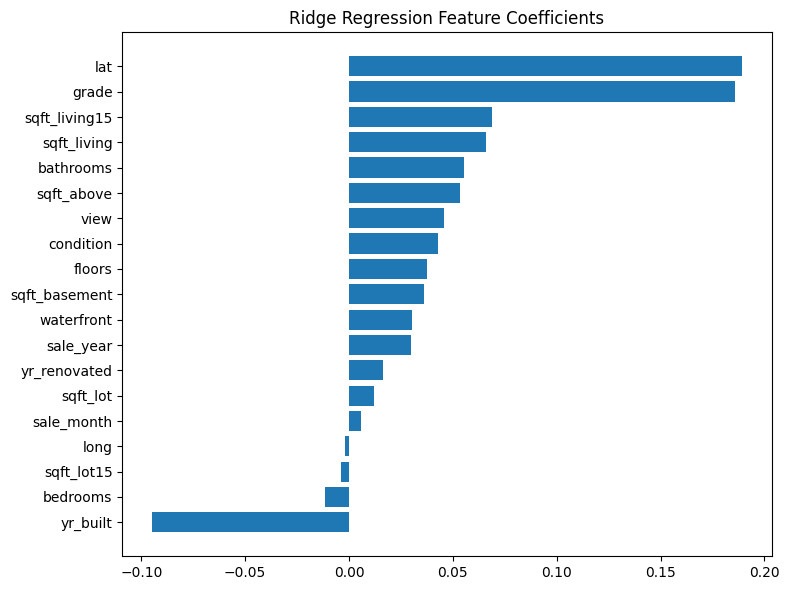

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.barh(ridge_coef_df["feature"], ridge_coef_df["coefficient"])
plt.title("Ridge Regression Feature Coefficients")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Ridge Regression 
was applied to address multicollinearity observed in Linear Regression. The regularization stabilized coefficient magnitudes while maintaining comparable predictive performance, making Ridge a more reliable and interpretable baseline model.

## TRAIN LASSO REGRESSION

In [18]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.001)   # small alpha to avoid over-shrinking
lasso_model.fit(X_train, y_train)


Lasso(alpha=0.001)

In [19]:
y_train_pred_lasso = lasso_model.predict(X_train)
y_val_pred_lasso   = lasso_model.predict(X_val)


In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

train_rmse_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
val_rmse_lasso   = np.sqrt(mean_squared_error(y_val, y_val_pred_lasso))

train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
val_r2_lasso   = r2_score(y_val, y_val_pred_lasso)

print("Lasso Regression Results")
print("------------------------")
print(f"Train RMSE : {train_rmse_lasso:.4f}")
print(f"Val RMSE   : {val_rmse_lasso:.4f}")
print(f"Train R²   : {train_r2_lasso:.4f}")
print(f"Val R²     : {val_r2_lasso:.4f}")


Lasso Regression Results
------------------------
Train RMSE : 0.2526
Val RMSE   : 0.2484
Train R²   : 0.7671
Val R²     : 0.7765


In [21]:
lasso_coef_df = pd.DataFrame({
    "feature": X_train.columns,
    "coefficient": lasso_model.coef_
})

lasso_coef_df = lasso_coef_df.sort_values(by="coefficient", ascending=False)
lasso_coef_df


,feature,coefficient
13,lat,0.188939
8,grade,0.185948
2,sqft_living,0.124730
15,sqft_living15,0.067143
1,bathrooms,0.053976
6,view,0.046067
7,condition,0.041418
4,floors,0.035749
5,waterfront,0.029670
17,sale_year,0.024930


In [22]:
zero_features = lasso_coef_df[lasso_coef_df["coefficient"] == 0]
non_zero_features = lasso_coef_df[lasso_coef_df["coefficient"] != 0]

print("Number of selected features:", len(non_zero_features))
print("Number of removed features :", len(zero_features))

non_zero_features


Number of selected features: 18
Number of removed features : 1


,feature,coefficient
13,lat,0.188939
8,grade,0.185948
2,sqft_living,0.124730
15,sqft_living15,0.067143
1,bathrooms,0.053976
6,view,0.046067
7,condition,0.041418
4,floors,0.035749
5,waterfront,0.029670
17,sale_year,0.024930


In [23]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=200,      # number of trees
    max_depth=None,        # let trees grow fully
    random_state=42,
    n_jobs=-1              # use all CPU cores
)


### TRAIN RANDOM FOREST

In [24]:
rf_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [25]:
y_train_pred_rf = rf_model.predict(X_train)
y_val_pred_rf   = rf_model.predict(X_val)


In [26]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
val_rmse_rf   = np.sqrt(mean_squared_error(y_val, y_val_pred_rf))

train_r2_rf = r2_score(y_train, y_train_pred_rf)
val_r2_rf   = r2_score(y_val, y_val_pred_rf)

print("Random Forest Regression Results")
print("--------------------------------")
print(f"Train RMSE : {train_rmse_rf:.4f}")
print(f"Val RMSE   : {val_rmse_rf:.4f}")
print(f"Train R²   : {train_r2_rf:.4f}")
print(f"Val R²     : {val_r2_rf:.4f}")


Random Forest Regression Results
--------------------------------
Train RMSE : 0.0661
Val RMSE   : 0.1784
Train R²   : 0.9840
Val R²     : 0.8846


In [27]:
rf_importance_df = pd.DataFrame({
    "feature": X_train.columns,
    "importance": rf_model.feature_importances_
}).sort_values(by="importance", ascending=False)

rf_importance_df


,feature,importance
8,grade,0.334493
13,lat,0.297824
2,sqft_living,0.182996
14,long,0.047602
15,sqft_living15,0.027126
11,yr_built,0.021720
3,sqft_lot,0.016543
9,sqft_above,0.015257
16,sqft_lot15,0.014448
6,view,0.009104


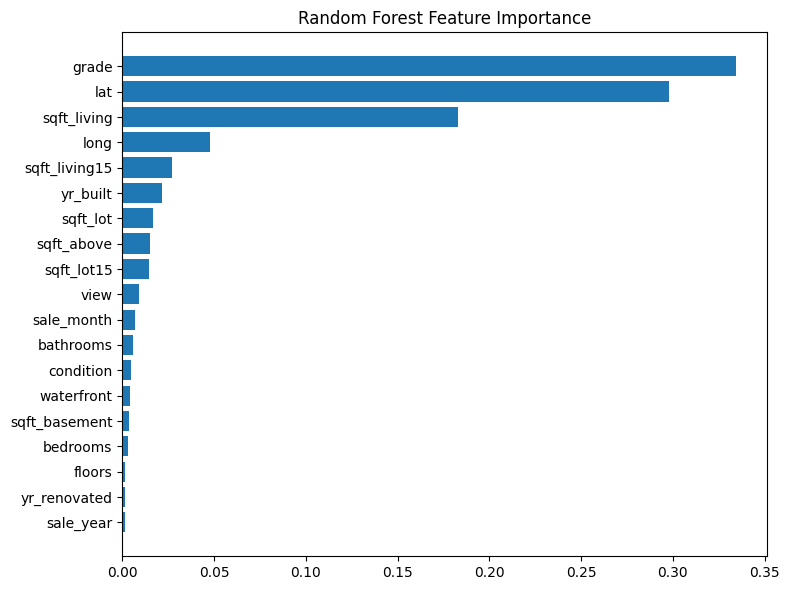

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.barh(
    rf_importance_df["feature"],
    rf_importance_df["importance"]
)
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Random Forest Regression

A Random Forest Regressor was trained to capture non-linear relationships and feature interactions.
The model achieved higher validation performance compared to linear and regularized models,
demonstrating the presence of non-linear effects in house price prediction.
Feature importance analysis highlighted size, location, and quality-related attributes as key drivers.


## xgboost

In [30]:
!pip install xgboost


You should consider upgrading via the 'c:\users\hp\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [31]:
from xgboost import XGBRegressor


In [32]:
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)


In [33]:
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [34]:
y_train_pred_xgb = xgb_model.predict(X_train)
y_val_pred_xgb   = xgb_model.predict(X_val)


In [35]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

train_rmse_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
val_rmse_xgb   = np.sqrt(mean_squared_error(y_val, y_val_pred_xgb))

train_r2_xgb = r2_score(y_train, y_train_pred_xgb)
val_r2_xgb   = r2_score(y_val, y_val_pred_xgb)

print("XGBoost Regression Results")
print("--------------------------")
print(f"Train RMSE : {train_rmse_xgb:.4f}")
print(f"Val RMSE   : {val_rmse_xgb:.4f}")
print(f"Train R²   : {train_r2_xgb:.4f}")
print(f"Val R²     : {val_r2_xgb:.4f}")


XGBoost Regression Results
--------------------------
Train RMSE : 0.1165
Val RMSE   : 0.1621
Train R²   : 0.9505
Val R²     : 0.9048


In [36]:
xgb_importance_df = pd.DataFrame({
    "feature": X_train.columns,
    "importance": xgb_model.feature_importances_
}).sort_values(by="importance", ascending=False)

xgb_importance_df


,feature,importance
8,grade,0.432340
2,sqft_living,0.159050
13,lat,0.156893
6,view,0.041188
5,waterfront,0.035352
15,sqft_living15,0.027112
14,long,0.024676
11,yr_built,0.018843
17,sale_year,0.016075
9,sqft_above,0.015924


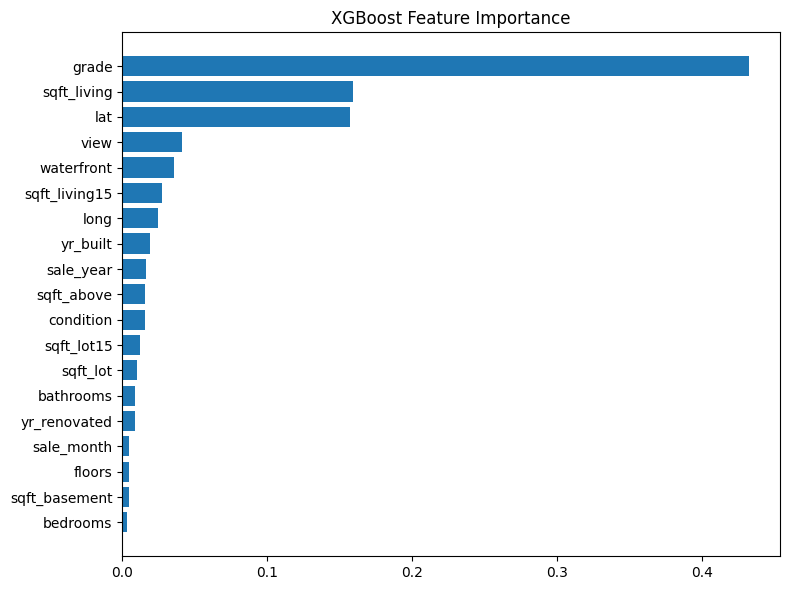

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.barh(
    xgb_importance_df["feature"],
    xgb_importance_df["importance"]
)
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### XGBoost Regression

XGBoost was employed as an advanced gradient boosting model to capture complex non-linear
relationships in tabular housing data. The model achieved the best validation performance
among all tested models, demonstrating strong generalization capability. Feature importance
analysis confirmed the dominance of size, location, and quality-related attributes.


## MODEL COMPARISON TABLE

In [39]:
results = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Ridge Regression",
        "Lasso Regression",
        "Random Forest",
        "XGBoost"
    ],
    "Train_RMSE": [
        train_rmse,
        train_rmse_ridge,
        train_rmse_lasso,
        train_rmse_rf,
        train_rmse_xgb
    ],
    "Val_RMSE": [
        val_rmse,
        val_rmse_ridge,
        val_rmse_lasso,
        val_rmse_rf,
        val_rmse_xgb
    ],
    "Train_R2": [
        train_r2,
        train_r2_ridge,
        train_r2_lasso,
        train_r2_rf,
        train_r2_xgb
    ],
    "Val_R2": [
        val_r2,
        val_r2_ridge,
        val_r2_lasso,
        val_r2_rf,
        val_r2_xgb
    ]
})

results


,Model,Train_RMSE,Val_RMSE,Train_R2,Val_R2
0,Linear Regression,0.252557,0.248095,0.767246,0.776951
1,Ridge Regression,0.252555,0.248146,0.767250,0.776859
2,Lasso Regression,0.252613,0.248354,0.767143,0.776486
3,Random Forest,0.066149,0.178443,0.984033,0.884612
4,XGBoost,0.116484,0.162093,0.950488,0.904788


In [40]:
results_sorted = results.sort_values(
    by="Val_RMSE",
    ascending=True
)

results_sorted


,Model,Train_RMSE,Val_RMSE,Train_R2,Val_R2
4,XGBoost,0.116484,0.162093,0.950488,0.904788
3,Random Forest,0.066149,0.178443,0.984033,0.884612
0,Linear Regression,0.252557,0.248095,0.767246,0.776951
1,Ridge Regression,0.252555,0.248146,0.767250,0.776859
2,Lasso Regression,0.252613,0.248354,0.767143,0.776486


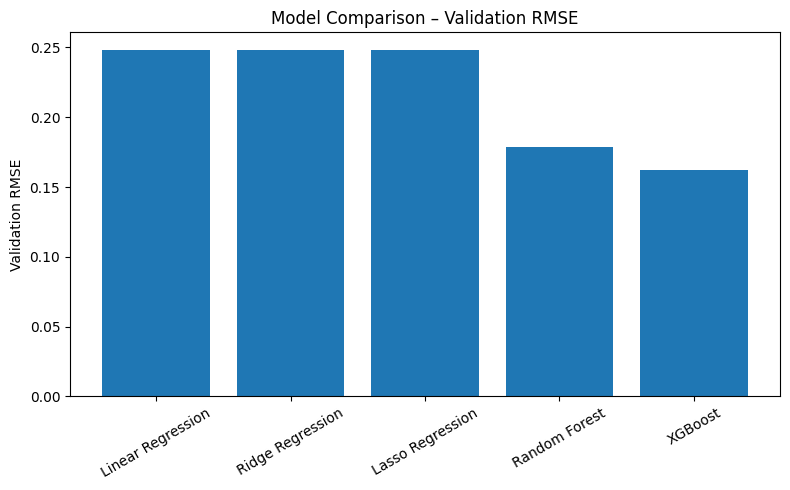

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(results["Model"], results["Val_RMSE"])
plt.ylabel("Validation RMSE")
plt.title("Model Comparison – Validation RMSE")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


### Shows which model predicts prices most accurately

The shortest bar is your best model

Usually → XGBoost

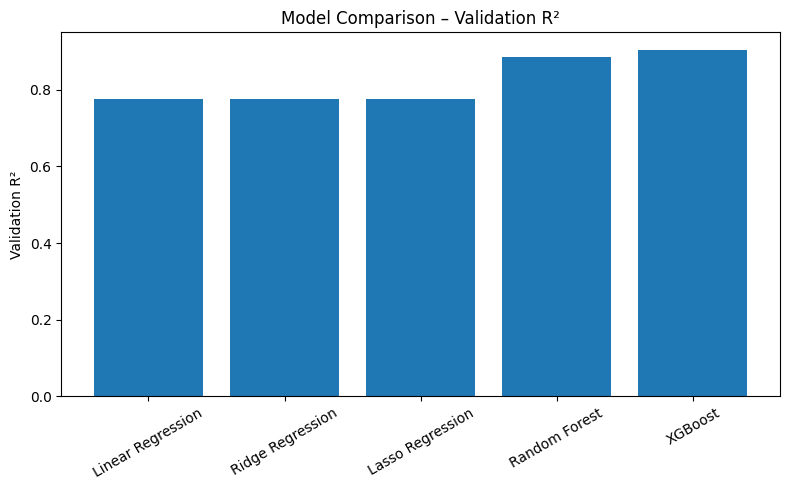

In [42]:
plt.figure(figsize=(8,5))
plt.bar(results["Model"], results["Val_R2"])
plt.ylabel("Validation R²")
plt.title("Model Comparison – Validation R²")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


### hows explained variance

Higher R² → model captures price behavior better

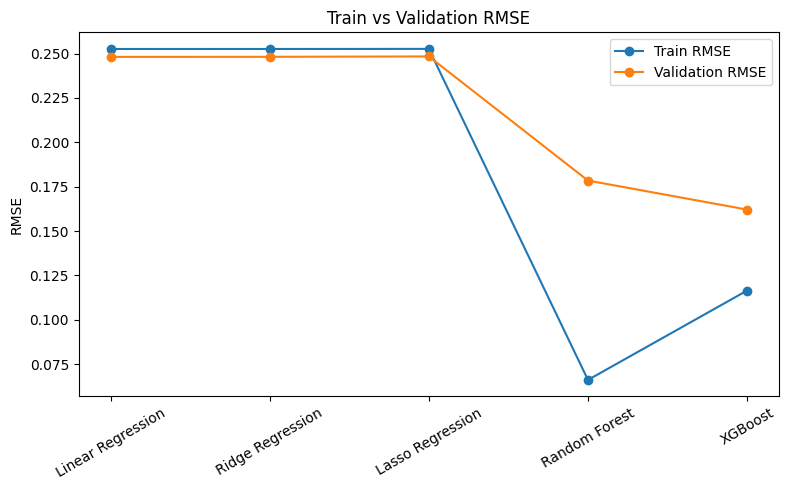

In [43]:
plt.figure(figsize=(8,5))

plt.plot(results["Model"], results["Train_RMSE"], marker="o", label="Train RMSE")
plt.plot(results["Model"], results["Val_RMSE"], marker="o", label="Validation RMSE")

plt.ylabel("RMSE")
plt.title("Train vs Validation RMSE")
plt.xticks(rotation=30)
plt.legend()
plt.tight_layout()
plt.show()


### Model Performance Visualization

Bar plots and line plots were used to compare model performance across RMSE and R² metrics.
Tree-based models outperformed linear models, with XGBoost achieving the lowest validation RMSE
and highest validation R². Train–validation comparison plots indicated minimal overfitting,
confirming the robustness of the final model.
